In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data2.csv'
data = pd.read_csv(url)

x = data['YearsExperience']
y = data['Salary']
data

,YearsExperience,EducationLevel,City,Salary
0,3.0,大學,城市A,45.9
1,7.8,碩士以上,城市C,80.5
2,2.3,高中以下,城市A,25.2
3,5.1,高中以下,城市A,30.4
4,10.0,碩士以上,城市B,65.7
5,1.2,碩士以上,城市C,60.8
6,8.6,大學,城市C,50.1
7,6.9,碩士以上,城市A,70.3
8,4.2,大學,城市A,40.7
9,2.4,高中以下,城市A,28.1


### label encoding 
將原先**文字**的特徵改為**數字**型式

In [4]:
#存在大小關係的特徵適用
data['EducationLevel'] = data['EducationLevel'].map({'高中以下':0,'大學':1, '碩士以上':2})

In [5]:
#不存在大小關係的特徵適用(one hot encoding)
#由於可藉由其他兩個特徵推導出第三個 因此可以刪除一特徵
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()#創建一個轉換器
onehot_encoder.fit(data[['City']])#只接受二維矩陣
city_encoded = onehot_encoder.transform(data[['City']]).toarray()#預設回傳稀疏矩陣 因此加上toarray()
city_encoded    

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [6]:
data[['CityA', 'CityB', 'CityC']] = city_encoded 
#新增三欄特徵值   
data

,YearsExperience,EducationLevel,City,Salary,CityA,CityB,CityC
0,3.0,1,城市A,45.9,1.0,0.0,0.0
1,7.8,2,城市C,80.5,0.0,0.0,1.0
2,2.3,0,城市A,25.2,1.0,0.0,0.0
3,5.1,0,城市A,30.4,1.0,0.0,0.0
4,10.0,2,城市B,65.7,0.0,1.0,0.0
5,1.2,2,城市C,60.8,0.0,0.0,1.0
6,8.6,1,城市C,50.1,0.0,0.0,1.0
7,6.9,2,城市A,70.3,1.0,0.0,0.0
8,4.2,1,城市A,40.7,1.0,0.0,0.0
9,2.4,0,城市A,28.1,1.0,0.0,0.0


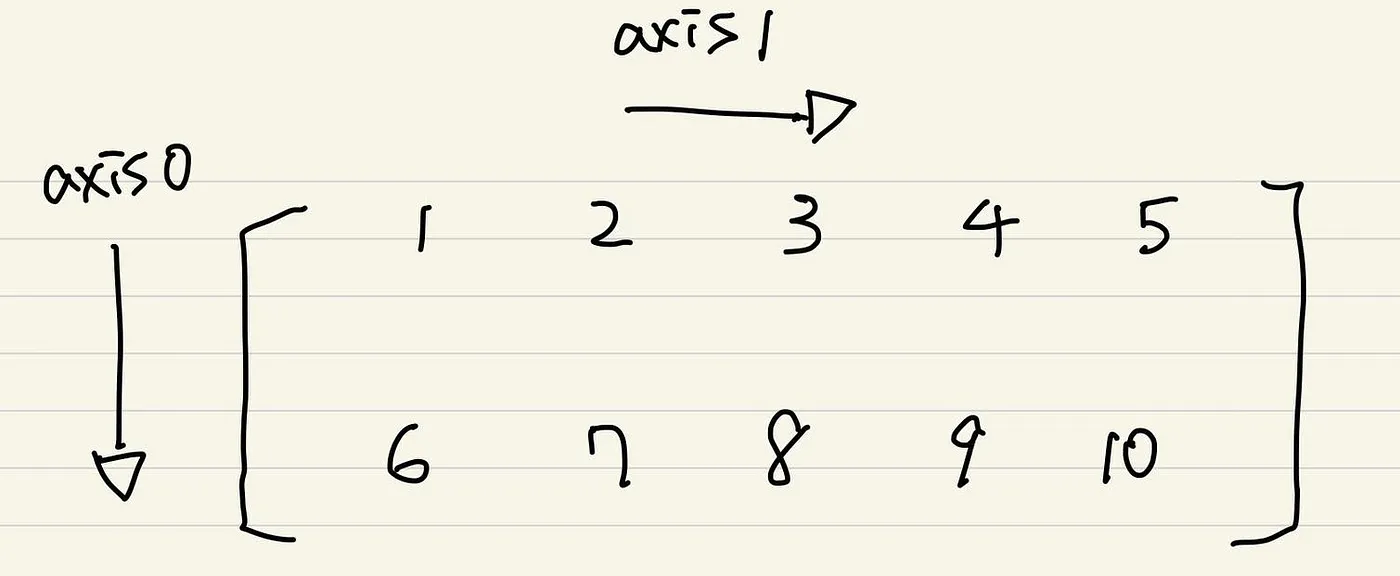

In [7]:
#刪除 'City' 和 'CityC' 兩欄
#使用 errors='ignore' 參數，這樣即使列不存在，也不會引發錯誤。
data = data.drop(['City', 'CityC'], axis=1, errors='ignore')
#axis=0代表沿著行的方向操作，每列進行, axis=1代表沿著列的方向操作，每行進行
data

,YearsExperience,EducationLevel,Salary,CityA,CityB
0,3.0,1,45.9,1.0,0.0
1,7.8,2,80.5,0.0,0.0
2,2.3,0,25.2,1.0,0.0
3,5.1,0,30.4,1.0,0.0
4,10.0,2,65.7,0.0,1.0
5,1.2,2,60.8,0.0,0.0
6,8.6,1,50.1,0.0,0.0
7,6.9,2,70.3,1.0,0.0
8,4.2,1,40.7,1.0,0.0
9,2.4,0,28.1,1.0,0.0


In [8]:
#訓練集和測試集
from sklearn.model_selection import train_test_split

x = data[['YearsExperience','EducationLevel','CityA','CityB']]
y = data['Salary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=87)
#預設為隨機分割資料 若想要分割的資料集為固定的可加上random_state並指定一數字(自訂)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
#轉換為矩陣型式方便計算

In [9]:
#scikit learn介紹
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

pd.DataFrame({
    'y_pred': y_pred,
    'y_test': y_test
})

,y_pred,y_test
20,44.035070,43.8
16,67.440313,72.7
5,61.954972,60.8
27,23.802655,24.9
32,62.748179,56.3
2,23.485373,25.2
1,72.425307,80.5
7,68.074879,70.3


### **特徵縮放（Feature Scaling）**
是預處理數據的一種技術，用於將數據的各個特徵縮放到相同範圍。這對於許多機器學習算法至關重要，因為這些算法對數據中的特徵尺度非常敏感。

#### **為什麼需要特徵縮放？**
##### **1.加速收斂：**
對於梯度下降算法，特徵縮放能夠**加速收斂速度**。
##### **2.防止某些特徵對結果的過度影響：**
如果特徵值範圍差異很大，則值範圍大的特徵可能會對模型結果**產生過大的影響**。
##### **3.保持數據的平衡：**
某些算法（例如 K 近鄰、支持向量機和線性回歸）對數據的特徵尺度非常敏感，特徵縮放有助於提高這些算法的性能。

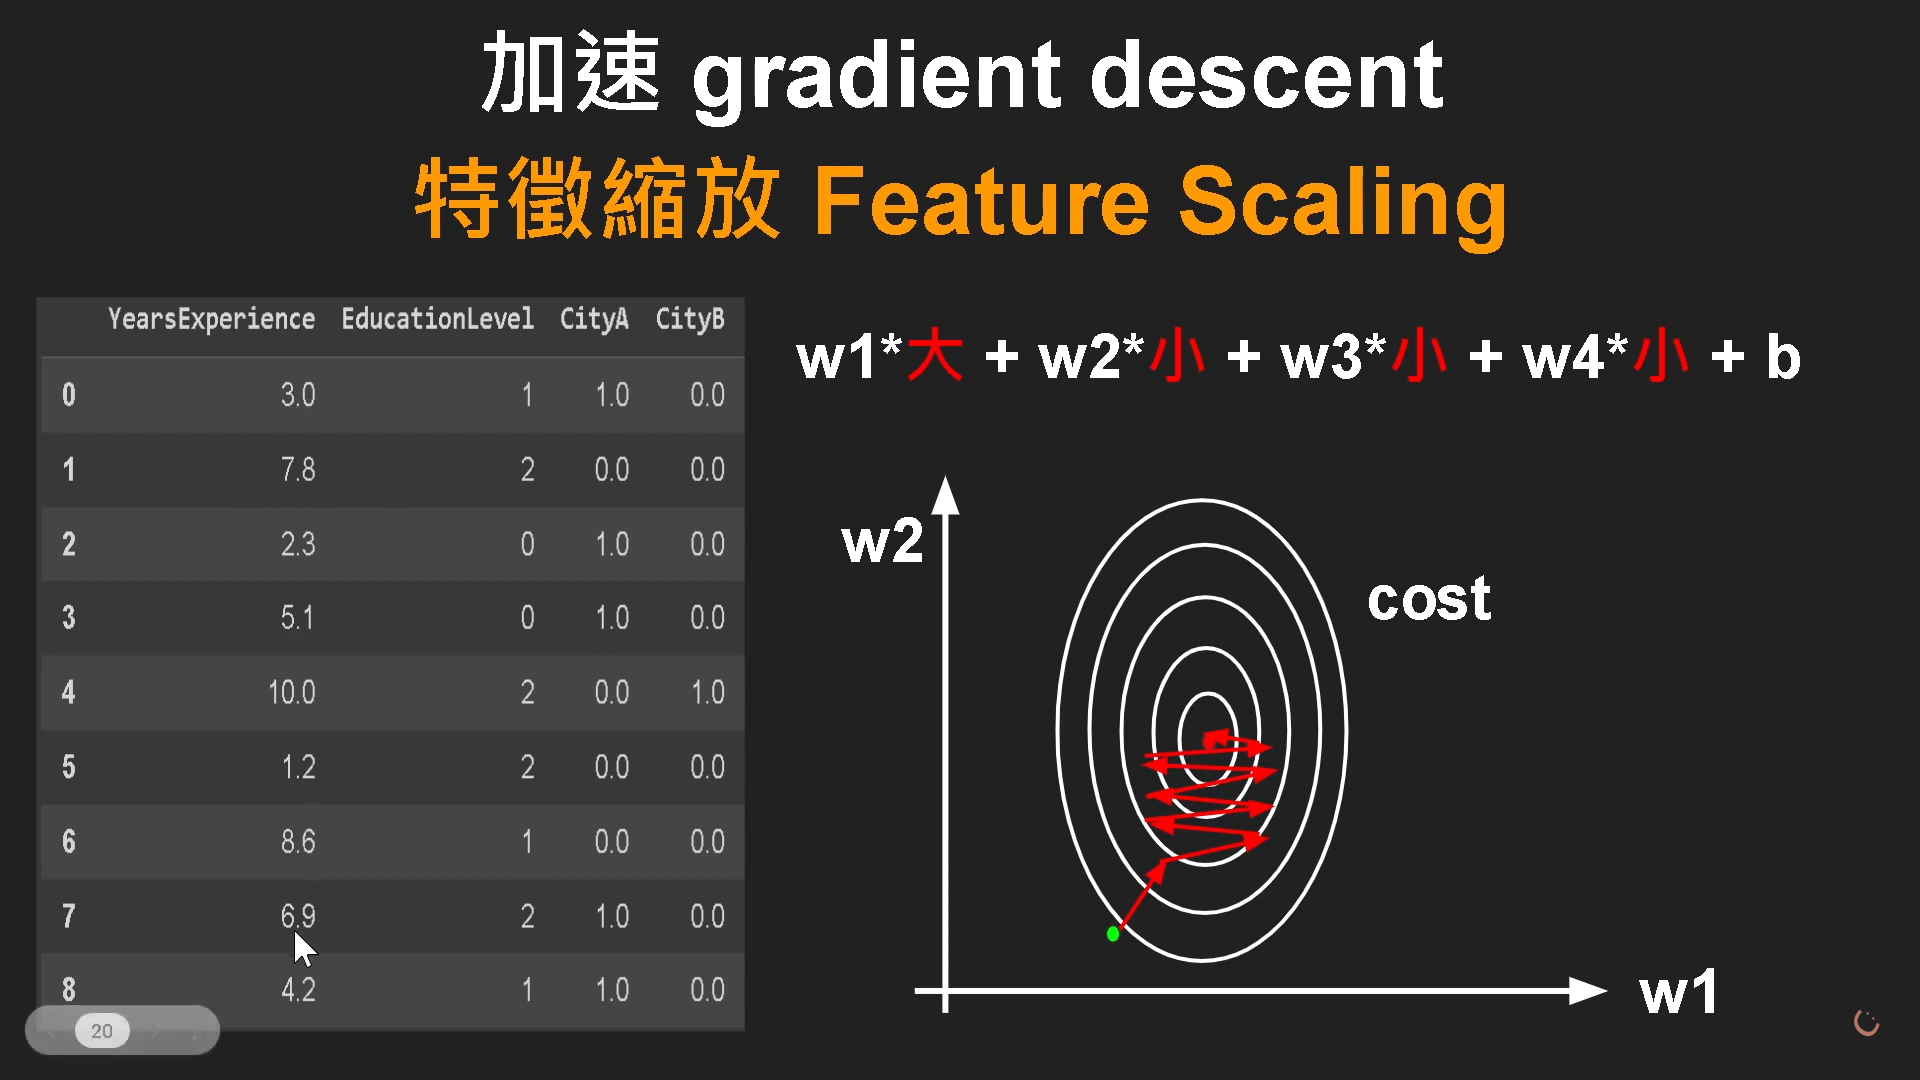

In [46]:
#在該資料中w1(0~10)的資料範圍明顯大於其他特徵(0~2,0~1)
#使用標準化((x-x.mean())/標準差)做特徵縮放
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)#計算標準差 這一步計算訓練數據的均值和標準差。fit 方法只應該在訓練數據上使用，因為測試數據應該根據訓練數據的統計量進行縮放，而不是根據測試數據本身。
x_train = scaler.transform(x_train)#使用計算出的均值和標準差對數據進行標準化處理。
x_test = scaler.transform(x_test)#使用計算出的均值和標準差對數據進行標準化處理。

#最終明顯加快了gradient descent的速度

In [47]:
#y(月薪) = w1*x1(年資) + w2*x2(學歷) + w3*x3(CityA) + w4*x4(CityB) + b
#目的為找出w1, w2, w3, w4, b以預測y
import numpy as np

w = np.array([1, 2, 3, 4])#自訂
b = 1#自訂
y_pred = (x_train*w).sum(axis=1)+b
y_pred
#sum()預設為行資料相加 因此加上axis=1(針對每一列做相加)

array([ 1.20e+00,  1.08e+00,  4.41e+00,  8.11e-01,  4.49e+00,  1.27e+00,
       -1.18e+00,  1.13e+01, -3.26e+00, -2.40e+00,  9.27e-01, -1.03e+00,
        1.13e+01, -3.43e+00, -1.25e+00,  1.13e+01,  1.04e+00, -1.17e+00,
       -3.38e+00, -1.10e+00, -1.29e+00, -2.29e+00,  5.80e-01, -1.21e+00,
       -3.51e+00, -3.28e+00, -3.36e+00,  1.13e+01])

In [48]:
#設定cost function
def compute_cost(x, y, w, b):
    y_pred = (x*w).sum(axis=1)+b
    cost = ((y - y_pred)**2).mean()
    return cost

In [49]:
w = np.array([1, 2, 3, 4])#自訂
b = 1#自訂
compute_cost(x_train, y_train, w, b)

2729.861648680892

In [50]:
#設定optimizer-gradient descent(訓練階段)

#以下為微分之後各參數之斜率
#w1_gradient = x1*(y_pred - y)
#w2_gradient = x2*(y_pred - y)
#w3_gradient = x3*(y_pred - y)
#w4_gradient = x4*(y_pred - y)
#b_gradient = (y_pred - y)

y_pred = (x_train*w).sum(axis=1)+b
b_gradient = (y_pred - y_train).mean()
w_gradient = np.zeros(x_train.shape[1])
#x_train為一(28,4)之陣列 取他的行資料

for i in range(x_train.shape[1]):
    w_gradient[i] = (x_train[:, i]*(y_pred - y_train)).mean()
    #[:, i]表示取第一個維度的所有資料後只取第i行的元素(x_train為二維矩陣)
    
w_gradient

array([-5.97e+00, -1.28e+01,  1.06e+01, -1.56e+00])

In [51]:
#定義計算斜率之函式
def compute_gradient(x, y, w, b):
    y_pred = (x*w).sum(axis=1)+b
    w_gradient = np.zeros(x.shape[1])
    b_gradient = (y_pred - y).mean()
    for i in range(x_train.shape[1]):
        w_gradient[i] = (x[:, i]*(y_pred - y)).mean()
    
    return w_gradient, b_gradient

In [52]:
w = np.array([1, 2, 3, 4])#自訂
b = 1#自訂
learning_rate = 0.001
w_gradient, b_gradient = compute_gradient(x_train, y_train, w, b)
print(compute_cost(x_train, y_train, w, b))

w = w-w_gradient*learning_rate
b = b-b_gradient*learning_rate
print(compute_cost(x_train, y_train, w, b))

2729.861648680892
2724.2438124861296


In [53]:
w=0#從0開始(自訂)
b=0#從0開始(自訂)
learning_rate = 0.001#(自訂)

np.set_printoptions(formatter={'float': '{: .2e}'.format})
#因為w和w_gradient為陣列形式 多加此行固定輸出資料格式以對齊

def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter):
    
    c_hist = []
    w_hist = []
    b_hist = []
    
    w = w_init
    b = b_init
    
    for i in range(run_iter):
        w_grediant, b_grediant = compute_gradient(x,y,w,b)

        #透過gradient descent來更新w和b的值
        w = w-w_grediant*learning_rate
        b = b-b_grediant*learning_rate
        #計算新的cost
        cost = compute_cost(x,y,w,b)
        #把產出的值存入陣列之中
        w_hist.append(w)
        b_hist.append(b)
        c_hist.append(cost)
        #避免output過多只顯示每1000次的結果
        if i%p_iter ==0:
            print(f'Interation:{i:5} : Cost:{cost: .2e}, w:{w:}, b:{b: .2e}, w_gradient:{w_grediant}, b_gradient:{b_grediant: .2e}')
            #空格.2e表示於左側填充空格(用於對齊)並只顯示以科學記號表示後2位數的結果
    return w, b, w_hist, b_hist, c_hist

In [54]:
w_init = np.array([1, 2, 3, 4])#起始值改為陣列形式
b_init = 1
learning_rate = 1.0e-2
run_iter = 10000
p_iter = 1000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x_train, y_train, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter, p_iter)

Interation:    0 : Cost: 2.67e+03, w:[ 1.06e+00  2.13e+00  2.89e+00  4.02e+00], b: 1.50e+00, w_gradient:[-5.97e+00 -1.28e+01  1.06e+01 -1.56e+00], b_gradient:-4.99e+01
Interation: 1000 : Cost: 2.53e+01, w:[ 3.75e+00  1.39e+01 -1.79e+00 -3.52e+00], b: 5.09e+01, w_gradient:[-8.99e-02 -5.68e-02 -7.79e-02  6.91e-02], b_gradient:-2.16e-03
Interation: 2000 : Cost: 2.52e+01, w:[ 4.09e+00  1.41e+01 -1.49e+00 -3.76e+00], b: 5.09e+01, w_gradient:[-7.65e-03 -4.70e-03 -7.13e-03  5.20e-03], b_gradient:-9.31e-08
Interation: 3000 : Cost: 2.52e+01, w:[ 4.12e+00  1.41e+01 -1.46e+00 -3.78e+00], b: 5.09e+01, w_gradient:[-6.46e-04 -4.01e-04 -6.08e-04  4.37e-04], b_gradient:-4.01e-12
Interation: 4000 : Cost: 2.52e+01, w:[ 4.12e+00  1.41e+01 -1.46e+00 -3.78e+00], b: 5.09e+01, w_gradient:[-5.48e-05 -3.41e-05 -5.16e-05  3.71e-05], b_gradient:-3.49e-13
Interation: 5000 : Cost: 2.52e+01, w:[ 4.12e+00  1.41e+01 -1.46e+00 -3.78e+00], b: 5.09e+01, w_gradient:[-4.64e-06 -2.89e-06 -4.38e-06  3.14e-06], b_gradient:-3

In [55]:
w_final, b_final

(array([ 4.12e+00,  1.41e+01, -1.46e+00, -3.78e+00]), 50.949999999999655)

In [56]:
#對照真實資料值和預測資料值
y_pred = (w_final*x_test).sum(axis=1) + b_final
pd.DataFrame({
    'y_pred': y_pred,
    'y_test': y_test
})

,y_pred,y_test
20,44.035070,43.8
16,67.440313,72.7
5,61.954972,60.8
27,23.802655,24.9
32,62.748179,56.3
2,23.485373,25.2
1,72.425307,80.5
7,68.074879,70.3


In [57]:
compute_cost(x_test, y_test, w_final, b_final)

18.11606054416733

In [59]:
# 5.3年 碩士以上 城市A
# 7.2年 高中以下 城市B
x_real = np.array([[5.3, 2, 1, 0], [7.2, 0, 0, 1]])
x_real = scaler.transform(x_real)
y_real = (w_final*x_real).sum(axis=1) + b_final
y_real

array([ 6.55e+01,  2.34e+01])